In [198]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#import tensorflow as tf
#from tensorflow import keras

from emnist import list_datasets, extract_training_samples, extract_test_samples

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Load data

In [2]:
print(list_datasets())

X_full_train, y_full_train = extract_training_samples('byclass')
X_test, y_test = extract_test_samples("byclass")

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size = 0.1, random_state = 123)
# del X_full_train, y_full_train # Free memory

# 2. Descriptius, visualització

In [26]:
n = len(X_train) + len(X_val) + len(X_test)
print("Train prop: ", len(X_train) / n * 100)
print("Validation prop: ", len(X_val) / n * 100)
print("Test prop: ", len(X_test) / n * 100)

Train prop:  77.14266415312156
Validation prop:  8.571516294035654
Test prop:  14.285819552842781


In [205]:
print(X_train.shape)
table_counts = pd.crosstab(y_train, columns = "counts")
table_counts

(628138, 28, 28)


col_0,counts
row_0,
0,31163
1,34586
2,30713
3,31606
4,30136
...,...
57,2590
58,2450
59,2538


In [ ]:
freq = pd.DataFrame(pd.DataFrame(y_train).value_counts(sort = False))
freq["perc"] = freq / len(y_train)

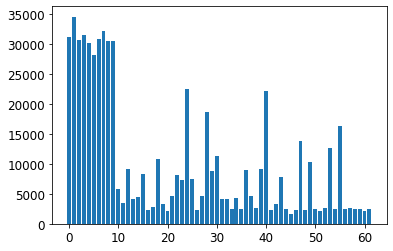

In [214]:
plt.bar(np.arange(62), np.array(table_counts).reshape(62))
plt.show()

(62,)

In [104]:
print("Maxim pixel = ", np.max(X_train))

n = len(X_train)
prop_greater = np.zeros((5, 28, 28)) # axis0 = pixel (0, 150, 250, mean, sd)

for row in range(X_train.shape[1]):
    for col in range(X_train.shape[2]):
        prop_greater[0, row, col] = np.count_nonzero(X_train[:, row, col])
        prop_greater[1, row, col] = np.count_nonzero(X_train[:, row, col] > 150)
        prop_greater[2, row, col] = np.count_nonzero(X_train[:, row, col] > 250)
        prop_greater[3, row, col] = np.mean(X_train[:, row, col])
        prop_greater[4, row, col] = np.std(X_train[:, row, col])

Maxim pixel =  255


In [105]:
def plot_img_cb(data, title = ""):
    plt.imshow(data)
    plt.axis("off")
    plt.colorbar()
    plt.title(title)
    plt.show()

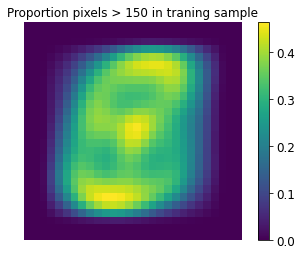

In [193]:
plot_img_cb(prop_greater[1] / n, "Proportion pixels > 150 in traning sample")

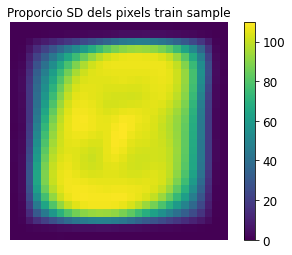

In [194]:
plot_img_cb(prop_greater[4], "Proporcio SD dels pixels train sample")

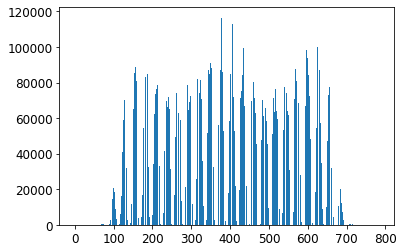

In [195]:
plt.bar(np.arange(28*28), prop_greater[2].reshape(28*28))
plt.show()

## Plotting images

In [189]:
def label_to_letter(label):
    if label >= 0 and label <= 9:
        return label
    elif label >= 10 and label <= 35:
        return chr(label + 55)
    elif label >= 36 and label <= 61:
        return chr(label + 61)
    else:
        raise ValueError("Label '{}' fora dels limits".format(label))

label_to_letter(1)

1

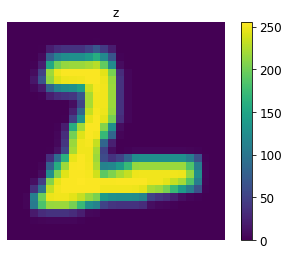

In [196]:
sample_images = X_train[y_train == 61][:10]
plot_img_cb(sample_images[4], label_to_letter(61))

In [199]:
def plot_images(images, labels, rows = 5, cols = 5, size_mult = 1.2):
    plt.figure(figsize = (cols * size_mult, rows * size_mult))
    for row in range(rows):
        for col in range(cols): 
            index = cols * row + col
            plt.subplot(rows, cols, index + 1)
            plt.imshow(images[index], cmap = "binary", interpolation = "nearest")
            plt.axis("off")
            plt.title(label_to_letter(labels[index]), fontsize = 12)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()

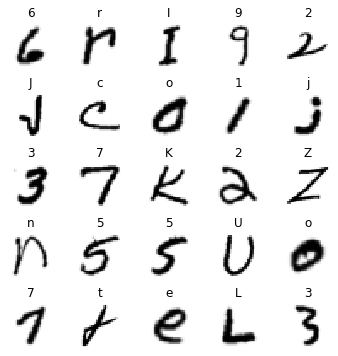

In [200]:
plot_images(X_train, y_train)

In [ ]:
for label in range()

sample_images = X_train[y_train == 61][:10]
plot_img_cb(sample_images[4], label_to_letter(61))

# 3. Preprocessament, transformacions

Min-Max scaling (normalization). Dividir per 255 ($X_f = \frac{X - X_{min}}{X_{max} - X_{min}}$).

Aquí tambè es pot probar feature extraction si probem models tradicionals.